In [1]:
!git clone https://gitfront.io/r/rchaguer/rpSp4S2YWX1R/OSNA-Fake-News-Classification.git
!mv OSNA-Fake-News-Classification OSNA

Cloning into 'OSNA-Fake-News-Classification'...


In [2]:
import tensorflow as tf
tf.get_logger().setLevel('WARNING')
tf.autograph.set_verbosity(2)

In [3]:
from OSNA.src.bert_dataloader import DataLoader_Bert
from OSNA.src.bert_model import BertModel


In [4]:
batch_size = 512
max_length = 128

In [5]:
dloader = DataLoader_Bert('OSNA/data', max_length=max_length, batch_size=batch_size)
train_gen, valid_gen = dloader.prepare_training()

In [6]:
model = BertModel(max_length)
model.create_model()

In [15]:
model.model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]        0           []                               
                                                                                                  
 attention_masks (InputLayer)   [(None, 128)]        0           []                               
                                                                                                  
 token_type_ids (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_masks[0][0]',    

In [7]:
history = model.fit(train_gen, valid_gen, epochs=5, batch_size=batch_size)


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Epoch 1/5
400/400 [==============================] - ETA: 0s - loss: 0.4586 - acc: 0.7960
Epoch 1: loss improved from inf to 0.45859, saving model to best_model.hdf5
400/400 [==============================] - 2350s 6s/step - loss: 0.4586 - acc: 0.7960 - val_loss: 0.3932 - val_acc: 0.8221
Epoch 2/5
400/400 [==============================] - ETA: 0s - loss: 0.3935 - acc: 0.8228
Epoch 2: loss improved from 0.45859 to 0.39347, saving model to best_model.hdf5
400/400 [==============================] - 2323s 6s/step - loss: 0.3935 - acc: 0.8228 - val_loss: 0.3638 - val_acc: 0.8371
Epoch 3/5
400/400 [==============================] - ETA: 0s - loss: 0.3695 - acc: 0.8358
Epoch 3: loss improved from 0.39347 to 0.36951, saving model to best_model.hdf5
400/400 [==============================] - 2317s 6s/step - loss: 0.3695 - acc: 0.8358 - val_loss: 0.3534 - val_acc: 0.8426
Epoch 4/5
400/400 [==============================] - ETA: 0s - loss: 0.3520 - acc: 0.8444
Epoch 4: loss improved from 0.36951

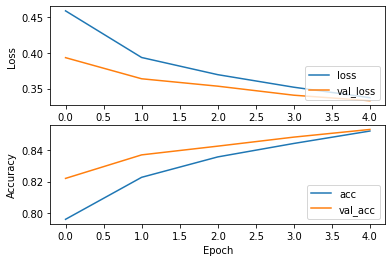

In [8]:
model.plot_history()

In [9]:
testd = dloader.prepare_testing()

In [10]:
sub = model.get_submission(testd, dloader.labels)


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
